In [14]:
from scipy import stats 
import matplotlib.pyplot as plt
from torch.nn import Embedding
import numpy as np
import torch
from patbert.features import utils
from patbert.features import tokenizer
import pandas as pd
import pickle 
import string
import importlib
from os.path import join
from patbert.common import common
importlib.reload(common)

<module 'patbert.common.common' from 'c:\\users\\fjn197\\phd\\projects\\phair\\pipelines\\patbert\\patbert\\common\\common.py'>

In [13]:
mimic_dir = "C:\\Users\\fjn197\\PhD\\projects\\PHAIR\\pipelines\\ehr_preprocess\\data\\processed\\mimic-iii-clinical-database-1.4"

## Explore medicine

In [15]:
med = pd.read_parquet(join(mimic_dir, 'concept.med.parquet'))

In [28]:
med.groupby('CONCEPT').VALUE_UNIT.nunique()[(med.groupby('CONCEPT').VALUE_UNIT.nunique()>1)].sort_values()

CONCEPT
M*NF BRINZOLAMIDE (AZOPT)     2
MMul                          2
MMult                         2
MMultiple Vitamins Liq.       2
MMultiv                       2
                             ..
MSodium Chloride              9
MSodium Bicarbonate           9
MPapain 2.5 % Solution        9
MPulmicort                   10
MAlbuterol Sulfate           13
Name: VALUE_UNIT, Length: 880, dtype: int64

In [29]:
med[med['CONCEPT']=='MAlbuterol Sulfate']

PID  ADMISSION_ID  ICUSTAY_ID  TIMESTAMP             CONCEPT VALUE  \
60799      808        100677      239433 2181-07-13  MAlbuterol Sulfate     5   
164021    2270        117731      299569 2118-12-30  MAlbuterol Sulfate     5   
164022    2270        117731      299569 2118-12-30  MAlbuterol Sulfate     5   
381793    5349        161837      299527 2147-04-18  MAlbuterol Sulfate     5   
445136    6166        160197        <NA> 2108-02-03  MAlbuterol Sulfate   2.5   
...        ...           ...         ...        ...                 ...   ...   
3734970  84914        199396      291014 2112-12-02  MAlbuterol Sulfate    15   
3781325  86712        141915      214132 2124-01-27  MAlbuterol Sulfate    10   
3826380  88441        196485      267257 2200-02-27  MAlbuterol Sulfate     0   
3883611  90508        125285      284680 2194-11-24  MAlbuterol Sulfate    20   
4060854  96695        160098      212197 2144-02-28  MAlbuterol Sulfate   0.5   

        VALUE_UNIT  
60799           mg  
164021       mg/ml  
164022       mg/ml  
381793          ml  
445136          mg  
...            ...  
3734970         mg  
3781325         mL  
3826380         mL  
3883611         mL  
4060854        BTL  

[61 rows x 7 columns]

In [31]:
med[med['CONCEPT']=='MAlbuterol Sulfate']['VALUE'].astype(float).hist()

ValueError: could not convert string to float: '5-10'

- convert mL to ml (or better: convert all capital lettes to normal)

In [25]:
med[med['CONCEPT']=='M*NF* Arginine HCl']

PID  ADMISSION_ID  ICUSTAY_ID  TIMESTAMP             CONCEPT VALUE  \
101379    1369        186547      243281 2180-10-25  M*NF* Arginine HCl    60   
101380    1369        186547      243281 2180-10-25  M*NF* Arginine HCl    60   
457367    6365        141958      266954 2200-08-04  M*NF* Arginine HCl    30   
608716    8492        123242      205099 2117-03-16  M*NF* Arginine HCl    30   
2330866  31520        161757        <NA> 2132-06-16  M*NF* Arginine HCl   100   
2330867  31520        161757        <NA> 2132-06-16  M*NF* Arginine HCl    10   
2330868  31520        161757        <NA> 2132-06-16  M*NF* Arginine HCl    10   
3183649  65582        157255      279995 2168-11-24  M*NF* Arginine HCl    30   

        VALUE_UNIT  
101379          gm  
101380          gm  
457367          gm  
608716           g  
2330866      mg/ml  
2330867      mg/ml  
2330868      mg/ml  
3183649         gm

In [26]:
med[med['CONCEPT']=='M*NF* Ertapenem Sodium']

PID  ADMISSION_ID  ICUSTAY_ID  TIMESTAMP                 CONCEPT  \
41010      523        196271        <NA> 2141-12-26  M*NF* Ertapenem Sodium   
340581    4787        199008        <NA> 2127-09-18  M*NF* Ertapenem Sodium   
340582    4787        199008        <NA> 2127-09-18  M*NF* Ertapenem Sodium   
355728    4966        127285        <NA> 2161-09-23  M*NF* Ertapenem Sodium   
355729    4966        127285        <NA> 2161-09-23  M*NF* Ertapenem Sodium   
...        ...           ...         ...        ...                     ...   
4068946  96930        148635        <NA> 2165-06-06  M*NF* Ertapenem Sodium   
4111560  98554        114592        <NA> 2125-10-19  M*NF* Ertapenem Sodium   
4117826  98734        123336        <NA> 2146-10-06  M*NF* Ertapenem Sodium   
4117827  98734        123336        <NA> 2146-10-06  M*NF* Ertapenem Sodium   
4145110  99613        175391        <NA> 2152-11-14  M*NF* Ertapenem Sodium   

        VALUE VALUE_UNIT  
41010       1          g  
340581    0.5          g  
340582    500          g  
355728    500         mg  
355729    500         mg  
...       ...        ...  
4068946     1         gm  
4111560     1          g  
4117826     1         gm  
4117827     1          g  
4145110     1          g  

[136 rows x 7 columns]

- Convert gm to g
- take care of mislabeling, e.g. the value 500 should clearly have the unit g

<AxesSubplot: >

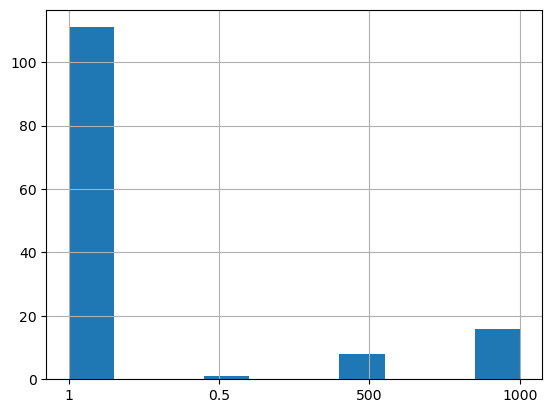

In [27]:
med[med['CONCEPT']=='M*NF* Ertapenem Sodium'].VALUE.hist()

In [20]:
med.CONCEPT.value_counts().to_dict()

{'MPotassium Chloride': 192993,
 'MInsulin': 143465,
 'MD5W': 142241,
 'MFurosemide': 133122,
 'M0.9% Sodium Chloride': 130147,
 'MNS': 129731,
 'MMagnesium Sulfate': 90427,
 'MIso-Osmotic Dextrose': 87005,
 'MSodium Chloride 0.9%  Flush': 83392,
 'MAcetaminophen': 78768,
 'MMetoprolol': 73986,
 'M5% Dextrose': 73829,
 'MSW': 72522,
 'MMorphine Sulfate': 62134,
 'MMetoprolol Tartrate': 59824,
 'MLorazepam': 55352,
 'MCalcium Gluconate': 52110,
 'MHeparin': 52069,
 'MDocusate Sodium': 45694,
 'MVancomycin': 42634,
 'MBisacodyl': 41075,
 'MWarfarin': 39678,
 'MHeparin Sodium': 37702,
 'MHYDROmorphone (Dilaudid)': 37673,
 'MLR': 35409,
 'MPropofol': 34462,
 'MPantoprazole': 33587,
 'MFentanyl Citrate': 31669,
 'MSenna': 29152,
 'MAspirin': 28410,
 'MBag': 25745,
 'MVial': 24502,
 'MVancomycin HCl': 22291,
 'MAlbuterol 0.083% Neb Soln': 22278,
 'MDextrose 50%': 21797,
 'MOxycodone-Acetaminophen': 21393,
 'MOndansetron': 21260,
 'MLevofloxacin': 20869,
 'MHaloperidol': 20710,
 'MRanitidine'

In [8]:
pat_dic = torch.load("C:\\Users\\fjn197\\PhD\\projects\\PHAIR\\pipelines\\patbert\\data\\sequence\\mimic-iii-clinical-database-1.4_0\\basic.pt")

In [9]:
pat_dic.keys()

dict_keys(['PID', 'ADMISSION_ID', 'ICUSTAY_ID', 'TIMESTAMP', 'CONCEPT', 'VALUE', 'VALUE_UNIT'])

In [11]:
pat_dic['ICUSTAY_ID']

[[212423, 212423, <NA>, <NA>, <NA>, <NA>, 212423],
 [291727, 287636],
 [268184,
  268184,
  <NA>,
  268184,
  268184,
  243882,
  <NA>,
  203511,
  218608,
  268184,
  218608,
  268184,
  218608,
  268184,
  243882],
 [<NA>,
  <NA>,
  <NA>,
  <NA>,
  <NA>,
  229355,
  <NA>,
  <NA>,
  <NA>,
  229355,
  288382,
  229355,
  229355,
  229355,
  288382,
  229355,
  <NA>,
  229355,
  <NA>,
  <NA>,
  <NA>,
  229355,
  229355,
  <NA>,
  229355,
  <NA>,
  229355,
  229355],
 [<NA>,
  <NA>,
  244756,
  244756,
  234236,
  234236,
  <NA>,
  244756,
  <NA>,
  234236,
  244756],
 [243073,
  252129,
  291628,
  270099,
  252129,
  252129,
  291628,
  291628,
  270099,
  252715,
  291628,
  <NA>,
  291628,
  283777],
 [<NA>],
 [<NA>, 212818],
 [244705, 244705, 244705, 244705],
 [<NA>, 203564, 203564, 212623, 212623],
 [<NA>, <NA>, 286940, 286940],
 [281656, 281656, 281656, 281656, <NA>],
 [<NA>, 248529, 248529, 248529, 248529, <NA>, 248529],
 [239175, 239175],
 [<NA>, <NA>, 239311, 239311],
 [233619,

In [4]:
synth_data = torch.load("C:\\Users\\fjn197\\PhD\\projects\\PHAIR\\pipelines\\patbert\\data\\processed\\synthetic.pt")
synth_data

[{'pid': 'p_0',
  'birthdate': datetime.datetime(1935, 3, 4, 0, 0),
  'sex': 1,
  'codes': ['MN03AX13', 'L21245', 'ML01XX29', 'MD06AX'],
  'ages': [71, 71, 71, 71],
  'visits': [1, 1, 1, 1],
  'abs_pos': [-1409, -1390, -1371, -1352],
  'values': [1.0, -0.09848548450942361, 1.0, 1.0]},
 {'pid': 'p_1',
  'birthdate': datetime.datetime(1942, 2, 4, 0, 0),
  'sex': 0,
  'codes': ['MJ05AF05', 'MD11AH03'],
  'ages': [42, 42],
  'visits': [1, 1],
  'abs_pos': [-9470, -9465],
  'values': [1.0, 1.0]},
 {'pid': 'p_2',
  'birthdate': datetime.datetime(1957, 1, 17, 0, 0),
  'sex': 0,
  'codes': ['DC813',
   'DH213K',
   'DM68',
   'L18818',
   'DA184D',
   'L11667',
   'L18695',
   'MA01AB17',
   'DP008C',
   'L36491',
   'L59825',
   'DM530A',
   'L19705',
   'L28887',
   'DQ730B',
   'DL253A'],
  'ages': [4, 4, 4, 5, 5, 11, 11, 13, 15, 15, 15, 15, 16, 16, 16, 16],
  'visits': [1, 2, 2, 3, 3, 4, 4, 5, 6, 6, 6, 6, 7, 7, 8, 8],
  'abs_pos': [-17877,
   -17857,
   -17828,
   -17513,
   -17504,
   -15

In [12]:
pat_dic['TIMESTAMP']

[[163353, 163353, 163353, 163353],
 [185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777,
  185777],
 [107064,
  107064,
  107064,
  107064,
  107064,
  107064,
  107064,
  107064,
  107064,
  107064,
  107064,
  107064,
  107064,
  107064,
  107064,
  107064,
  107064,
  107064,
  107064,
  107064,
  107064,
  107064,
  107064,
  107064,
  107064,
  107064,
  107064,
  107064,
  107064,
  107064,
  107064,
  107064,
  107064,
  107064,
  107064,
  107064,
  107064,
  10

In [8]:
pat_dic[list(pat_dic.keys())[a4]]

[[Timestamp('2138-07-18 00:00:00'),
  Timestamp('2138-07-18 00:00:00'),
  Timestamp('2138-07-18 00:00:00'),
  Timestamp('2138-07-18 00:00:00')],
 [Timestamp('2191-03-16 00:00:00'),
  Timestamp('2191-03-16 00:00:00'),
  Timestamp('2191-03-16 00:00:00'),
  Timestamp('2191-03-16 00:00:00'),
  Timestamp('2191-03-16 00:00:00'),
  Timestamp('2191-03-16 00:00:00'),
  Timestamp('2191-03-16 00:00:00'),
  Timestamp('2191-03-16 00:00:00'),
  Timestamp('2191-03-16 00:00:00'),
  Timestamp('2191-03-16 00:00:00'),
  Timestamp('2191-03-16 00:00:00'),
  Timestamp('2191-03-16 00:00:00'),
  Timestamp('2191-03-16 00:00:00'),
  Timestamp('2191-03-16 00:00:00'),
  Timestamp('2191-03-16 00:00:00'),
  Timestamp('2191-03-16 00:00:00'),
  Timestamp('2191-03-16 00:00:00'),
  Timestamp('2191-03-16 00:00:00'),
  Timestamp('2191-03-16 00:00:00'),
  Timestamp('2191-03-16 00:00:00'),
  Timestamp('2191-03-16 00:00:00'),
  Timestamp('2191-03-16 00:00:00'),
  Timestamp('2191-03-16 00:00:00'),
  Timestamp('2191-03-16 00:

In [2]:
import pandas as pd
import seaborn as sns

In [5]:
A = torch.randn((3,3,3))
B = torch.arange(9).reshape(3,3)
B.expand_as(A)

tensor([[[0, 1, 2],
         [3, 4, 5],
         [6, 7, 8]],

        [[0, 1, 2],
         [3, 4, 5],
         [6, 7, 8]],

        [[0, 1, 2],
         [3, 4, 5],
         [6, 7, 8]]])

In [11]:
value_mat = torch.ones((6,64,300))
values = torch.randn((64,300))
last_non_zero = torch.randint(0,6, (64,300))
values_expanded = values.repeat(6, 1, 1)
# value_mat[last_non_zero] = values_expanded[last_non_zero]
# value_mat[:,0,0]

In [24]:
new_value_mat[:,0,0]

tensor([ 1.0000,  1.0000,  1.0000,  1.0000,  1.0000, -0.8939])

In [23]:
new_value_mat = value_mat.scatter(0, last_non_zero.unsqueeze(0), values.unsqueeze(0))

In [4]:
value_mat = value_mat.scatter(0, last_non_zero, value_mat.unsqueeze(0))

RuntimeError: Index tensor must have the same number of dimensions as self tensor

In [2]:
torch.cuda.is_available()

False

In [3]:
import torch

def remap_values(remapping, x):
    index = torch.bucketize(x.ravel(), remapping[0])
    return remapping[1][index].reshape(x.shape)


remapping = torch.arange(0, 256), torch.randperm(256)
images_batch = torch.randint(0, 256, (16, 224, 224, 3))
remapped_batch = remap_values(remapping, images_batch)


In [5]:
with open("C:\\Users\\fjn197\\PhD\\projects\\pipelines\\patbert_static\\patbert\\data\\raw\\synthetic.pkl", 'rb') as f:
    data = pickle.load(f)

In [10]:
p= data[0]
print(len(p['codes']), len(p['values']))

7 7


In [15]:
data_tok = torch.load("C:\\Users\\fjn197\\PhD\\projects\\pipelines\\patbert_static\\patbert\\data\\tokenized\\synthetic.pt")

In [16]:
p = data_tok[0]
print(len(p['codes']), len(p['values']), len(p['idx']))

14 13 14


In [5]:
for k, v in data_tok[0].items():
    print(k, v)
print('visits is missing the 0 for the first sep token')

visits [0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2]
codes ['<CLS>', '<SEX>1', '<BIRTHYEAR>1950', '<BIRTHMONTH>8', '<SEP>', 'L845', 'L446', 'DM07714', 'DV556', '<SEP>', 'MB75M17', 'DU8331', 'DY460', '<SEP>']
ages [0, 0, 0, 0, 57, 57, 57, 57, 57, 58, 58, 58, 58]
abs_pos [0, 0, 0, 0, -882, -869, -856, -843, -843, -514, -501, -488, -488]
values [1, 1, 1, 1, 0.5502537430336992, 0.4261239468194264, 1.0, 1.0, 1, 1.0, 1.0, 1.0, 1]
los [0, 0, 0, 0, 0, 0, 0, 0, 39, 0, 0, 0, 26]
idx [1, 7, 58, 137, 3, 142, 143, 144, 145, 3, 146, 147, 148, 3]
visits is missing the 0 for the first sep token


In [ ]:
codes = []
with open("..\\..\\data\\medical\\SKScomplete.txt") as f:
    for line in f:
        codes.append(line.split(' ')[0])
codes = set(codes)
icd_codes =[c.strip('dia') for c in codes if c.startswith('dia')]
atc_codes = [c.strip('atc') for c in codes if c.startswith('atc')]

In [ ]:
ls = ['ab', 'cd', 'ef']
code = 'abc'
bool_ls =[code.startswith(l) for l in ls]
bool_ls.index(True)

0

In [ ]:
from patbert.common import medical
import importlib
import pickle as pkl
importlib.reload(medical)
from patbert.features import embeddings
importlib.reload(embeddings)

<module 'patbert.features.embeddings' from 'c:\\users\\fjn197\\phd\\projects\\pipelines\\patbert_static\\patbert\\patbert\\features\\embeddings.py'>

In [ ]:
sks = medical.SKSVocabConstructor()
icd = sks.get_icd()
atc = sks.get_atc()
codes_test = [icd[0], atc[0], icd[1], '<BIRTHYEAR>1950', '<BIRTHMONTH>4']

In [ ]:
'<adfbjks>1234'.split('>')[0]

'1234'

In [ ]:
emb = embeddings.StaticHierarchicalEmbedding(10)
emb.get_ids_from_codes(codes_test)

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

In [46]:
alpha = string.ascii_uppercase
long_codes = [c for c in sks.get_icd() if len(c)>4]
[c for c in long_codes if c[4].isupper()]

['DU26D0',
 'DU06D5',
 'DU44D6',
 'DU08D6',
 'DU28D5',
 'DU17D2',
 'DU33D0',
 'DU39D4',
 'DU33D6',
 'DU22D5',
 'DU14D5',
 'DU39D5',
 'DU32D0',
 'DU19DX',
 'DU23DX',
 'DU30D1',
 'DU23D3',
 'DU20D0',
 'DU03D5',
 'DU37D0',
 'DU11D4',
 'DU33D3',
 'DU02D0',
 'DU21DX',
 'DU27DX',
 'DU35D3',
 'DU16D6',
 'DU05D1',
 'DU19D0',
 'DU35DX',
 'DU17D6',
 'DU30D3',
 'DU34D6',
 'DU36D2',
 'DU28D4',
 'DU26D1',
 'DU27D6',
 'DU27D0',
 'DU30DX',
 'DU10D3',
 'DU11D2',
 'DU15D0',
 'DU24D2',
 'DU13D5',
 'DU05DX',
 'DU34DX',
 'DU01DX',
 'DU12D1',
 'DU06D6',
 'DU42D2',
 'DU06DX',
 'DU05D0',
 'DU34D3',
 'DU33D2',
 'DVAXX',
 'DU29D6',
 'DU01D3',
 'DU02D6',
 'DU21D3',
 'DU39D6',
 'DU38D6',
 'DU30D2',
 'DU29D4',
 'DU08D4',
 'DU37DX',
 'DU02D4',
 'DU42D4',
 'DU15DX',
 'DU42DX',
 'DU13DX',
 'DU25DX',
 'DU03D4',
 'DU34D1',
 'DU27D5',
 'DU29D0',
 'DU21D2',
 'DU36D3',
 'DU32D1',
 'DU30D4',
 'DU19D6',
 'DU23D5',
 'DU33D5',
 'DU11D5',
 'DU16D5',
 'DU22D1',
 'DU09DX',
 'DU09D0',
 'DU28DX',
 'DU28D1',
 'DU42D5',
 'DU28D6',


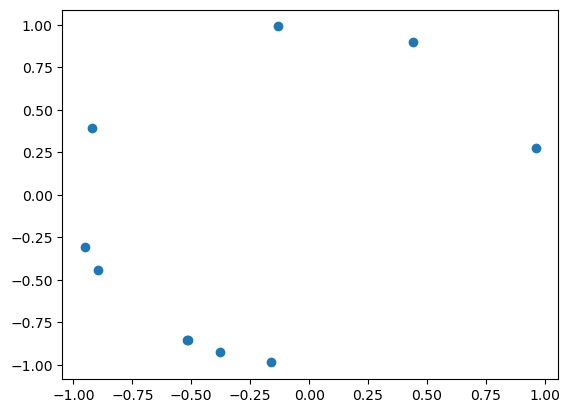

In [76]:
# Generate a 3-dimensional Halton sequence with 1000 points
torch.manual_seed(1)
emb = Embedding(1000, 2, _weight=torch.randn(1000, 2))
points = torch.tensor(np.arange(10))
points = emb(points).detach().numpy()
points = points/np.linalg.norm(points, axis=1, keepdims=True)
plt.scatter(points[:,0], points[:,1])

In [61]:
string.digits

'0123456789'

In [63]:
import string
from patbert.common import medical 
import importlib
import sys
importlib.reload(medical)
def construct_dict(level):
    """Construct a dictionary of ICD and ATC codes at level"""
    vocab = {}
    if level==1:
        for a in string.ascii_uppercase:
            for i in range(10):
                for j in range(10):
                    code = a+str(i)+str(j)
                    vocab['D'+code] = medical.ICD_topic(a+str(i)+str(j))
        for a in 'ABCDJGHLMNPRSV':
            for i in range(10):
                for j in range(10):
                    code = a+str(i)+str(j)
                    vocab['M'+code] = medical.ATC_topic(a)
    
    elif level==2:
        #categories
        #A01
        v1 = construct_dict(1)
        for k in v1:
            # order is important here
            if k.startswith('D'):
                vocab[k] = len(vocab)+1
            elif k.startswith('M'):
                vocab[k] = vocab['D'+k[1:]] #take the disease categories values
    
    elif level==3:
        #subcategories
        # A01A
        v2 = construct_dict(2)
        for k in v2:
            if k.startswith('D'):
                for i in range(10):
                    code = k+str(i)
                    vocab[code] = i+1
            if k.startswith('M'):
                for i in range(10):
                    code = k+str(i)
                    vocab[code] = i+1
    elif level==4:
        v3 = construct_dict(3)
        alphanumeric_ls = list(string.ascii_uppercase)+list(string.digits)
        for k in v3:
            if k.startswith('D'):
                for i, alphanumeric in enumerate(alphanumeric_ls):
                    code = k+alphanumeric
                    vocab[code] = i + 1
            if k.startswith('M'):
                for i, a in enumerate(string.ascii_uppercase):
                    code = k+a
                    vocab[code] = i + 1
        
    return vocab
vocab = construct_dict(4)
vocab

{'DA000A': 1,
 'DA000B': 2,
 'DA000C': 3,
 'DA000D': 4,
 'DA000E': 5,
 'DA000F': 6,
 'DA000G': 7,
 'DA000H': 8,
 'DA000I': 9,
 'DA000J': 10,
 'DA000K': 11,
 'DA000L': 12,
 'DA000M': 13,
 'DA000N': 14,
 'DA000O': 15,
 'DA000P': 16,
 'DA000Q': 17,
 'DA000R': 18,
 'DA000S': 19,
 'DA000T': 20,
 'DA000U': 21,
 'DA000V': 22,
 'DA000W': 23,
 'DA000X': 24,
 'DA000Y': 25,
 'DA000Z': 26,
 'DA0000': 27,
 'DA0001': 28,
 'DA0002': 29,
 'DA0003': 30,
 'DA0004': 31,
 'DA0005': 32,
 'DA0006': 33,
 'DA0007': 34,
 'DA0008': 35,
 'DA0009': 36,
 'DA001A': 1,
 'DA001B': 2,
 'DA001C': 3,
 'DA001D': 4,
 'DA001E': 5,
 'DA001F': 6,
 'DA001G': 7,
 'DA001H': 8,
 'DA001I': 9,
 'DA001J': 10,
 'DA001K': 11,
 'DA001L': 12,
 'DA001M': 13,
 'DA001N': 14,
 'DA001O': 15,
 'DA001P': 16,
 'DA001Q': 17,
 'DA001R': 18,
 'DA001S': 19,
 'DA001T': 20,
 'DA001U': 21,
 'DA001V': 22,
 'DA001W': 23,
 'DA001X': 24,
 'DA001Y': 25,
 'DA001Z': 26,
 'DA0010': 27,
 'DA0011': 28,
 'DA0012': 29,
 'DA0013': 30,
 'DA0014': 31,
 'DA0015': 32

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://medinfo.dk/sks/brows.php?s_nod=0'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')

disease_codes = []

for td in soup.find_all('td'):
    if td.text.startswith('D'):
        disease_codes.append(td.text)

print(disease_codes)

In [70]:
sys.getsizeof(vocab)/1e9

0.041943136

In [78]:

import pickle
vocab = torch.load('..\\..\\data\\vocabs\\simulated.pt')
inv_vocab = {v:k for k,v in vocab.items()}
data_tok = torch.load('..\\..\\data\\tokenized\\simulated.pt')
with open('..\\..\\data\\raw\\simulated.pkl', 'rb') as f:
    data = pickle.load(f)






In [79]:
import importlib
importlib.reload(tokenizer)
tok = tokenizer.HierarchicalTokenizerStatic()
tok.batch_encode(data[:3])

[{'pid': 'p_0',
  'birthdate': datetime.datetime(1950, 8, 9, 0, 0),
  'sex': 1,
  'codes': ['<SEP>',
   'L845',
   'L446',
   'DM07714',
   'DV556',
   '<SEP>',
   'MN92I04',
   'DU8331',
   'DY460',
   '<SEP>'],
  'ages': [0, 57, 57, 57, 57, 57, 58, 58, 58, 58],
  'los': [0, 13, 13, 13, 13, 13, 13, 13, 13, 13],
  'visits': [0, 1, 1, 1, 1, 1, 2, 2, 2, 2],
  'abs_pos': [0, -882, -869, -856, -843, -843, -514, -501, -488, -488],
  'values': [1,
   0.5502537430336992,
   0.4261239468194264,
   1.0,
   1.0,
   1,
   1.0,
   1.0,
   1.0,
   1],
  'idx': [2, 9, 10, 11, 12, 2, 13, 14, 15, 2],
  'top_lvl_idx': [2, 9, 9, 10, 10, 2, 11, 10, 10, 2]},
 {'pid': 'p_1',
  'birthdate': datetime.datetime(1967, 7, 25, 0, 0),
  'sex': 1,
  'codes': ['<SEP>',
   'L5',
   '<SEP>',
   'MO46M25',
   'L17',
   'ML30F43',
   '<SEP>',
   'L414',
   '<SEP>',
   'DE36505',
   '<SEP>',
   'MB42B71',
   '<SEP>',
   'DC1432',
   'MT32S02',
   'DE06909',
   '<SEP>',
   'L198',
   '<SEP>',
   'DX0311',
   'L479',
   '<

In [37]:
%%timeit
masked_idxs, labels = utils.random_mask(p1['idx'], vocab,special_tokens=['<SEP>'], mask_prob=.80)

1.02 ms ± 92.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [38]:
%%timeit
masked_idxs_n, labels_n = utils.random_mask_arr(p1['idx'], vocab,special_tokens=['<SEP>'], mask_prob=.80)

1.04 ms ± 132 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [59]:
import importlib
importlib.reload(utils)
masked_idxs, labels = utils.random_mask(p1['idx'], vocab,special_tokens=['<SEP>'], 
    mask_prob=.1)
masked_idxs_n, labels_n = utils.random_mask_arr(p1['idx'], vocab,special_tokens=['<SEP>'],
    mask_prob=.80)

print(labels)
print([inv_vocab[m] for m in masked_idxs])

[-100, -100, -100, -100, 32, -100, -100, -100, -100, -100, -100, -100, -100, -100, 40, -100, -100, -100, -100, -100, -100, -100, -100, 47, -100, -100]
['<SEP>', 'DI182', 'MQ60S18', '<SEP>', '<MASK>', 'MC93O44', 'MO70Q73', 'MG26Y31', '<SEP>', 'DK02602', 'L251', 'MK86C11', '<SEP>', 'DT2824', 'MB92H53', 'MU49W97', 'L704', '<SEP>', 'DX07750', 'L520', 'MJ50K90', '<SEP>', 'DG5113', '<MASK>', 'L835', '<SEP>']
